In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
# !pip install seaborn
# Great analysis done by: https://www.youtube.com/watch?v=Wqmtf9SA_kk


### Load Dataset (sklearn)

In [65]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


### Correlation Feature Selection

- Compute correlation coefficient
- Use SelectKBest() function with argument 'score_func' given by f_regression, both from sklearn.feature_selection 

In [61]:
# example of correlation feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [62]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

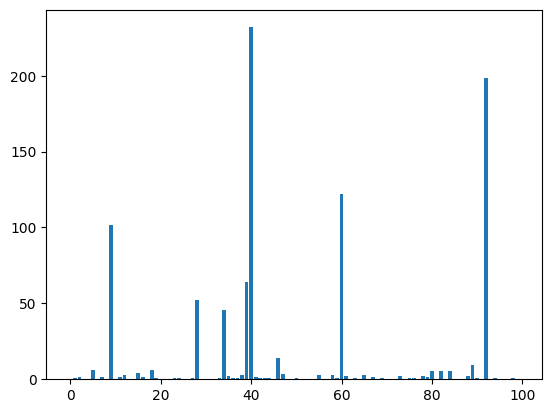

In [66]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Mutual Information Feature Selection

- Typically used for decision trees
- - Use SelectKBest() function with argument 'score_func' given by mutual_info_regression, both from sklearn.feature_selection 

In [11]:
# example of mutual information feature selection for numerical input data
from sklearn.feature_selection import mutual_info_regression

In [12]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

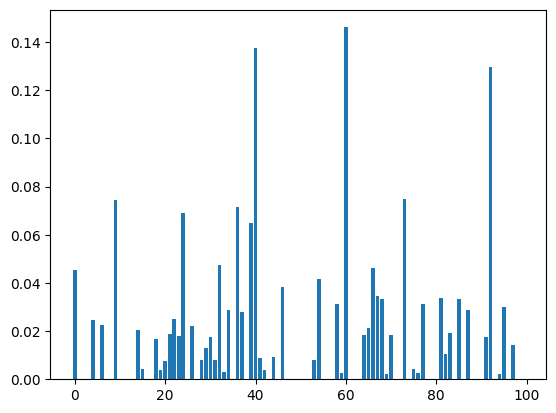

In [14]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
#for i in range(len(fs.scores_)):
#	print('Feature %d: %f' % (i, fs.scores_[i]))


# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### LinearRegression built using ALL features

In [55]:
# evaluation of a model using all input features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [56]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.5f' % mae)

MAE: 0.08569


In [57]:
# R^2 coefficient
model.score(X_test, y_test)

0.999999725955

In [58]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1_test = sm.add_constant(X_test)
result = sm.OLS(y_test, X1_test).fit()

#print dir(result)
print([result.rsquared, result.rsquared_adj])


[0.9999998351604563, 0.9999997631781228]


<BarContainer object of 100 artists>

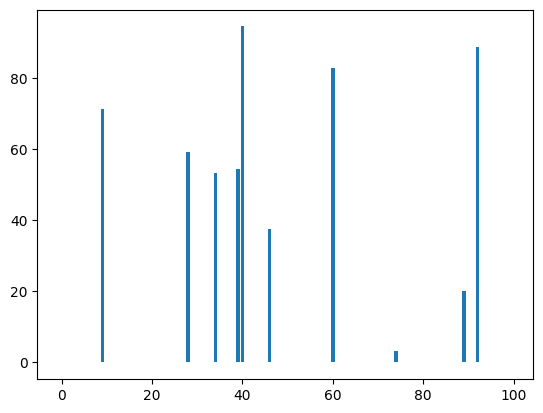

In [59]:
# index = np.arange(1, 101, 1, dtype=int)
plt.bar([i for i in range(100)], result.params[1:])

In [38]:
# result.summary()

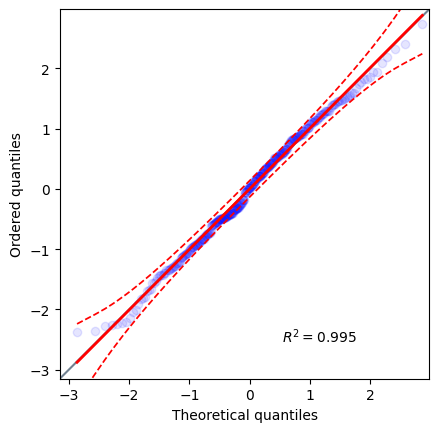

In [60]:
residual = y_test - yhat

ax = pg.qqplot(residual, dist='norm', confidence=.95, alpha=0.1)

### LinearRegression built using Correlation Features

In [85]:
# evaluation of a model using 10 features chosen with correlation
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [86]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
                                            
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
                                            
# evaluate the model
yhat = model.predict(X_test_fs)
                                            
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


In [87]:
# compute with statsmodels, by adding intercept manually
# import statsmodels.api as sm
X1_test = sm.add_constant(X_test)
result = sm.OLS(y_test, X1_test).fit()

#print dir(result)
print([result.rsquared, result.rsquared_adj])

[0.9999998351604563, 0.9999997631781228]


- In this case, we see that the model achieved an error score of about 2.7, which is much larger than the baseline model that used all features and achieved an MAE of 0.086.
- This suggests that although the method has a strong idea of what features to select, building a model from these features alone does not result in a more skillful model. This could be because features that are important to the target are being left out, meaning that the method is being deceived about what is important.
- Let’s go the other way and try to use the method to remove some redundant features rather than all redundant features.

In [83]:
# evaluation of a model using 88 features chosen with correlation
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=87)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.5f' % mae)

MAE: 0.08492


- In this case, we can see that removing some of the redundant features has resulted in a small lift in performance with an error of about 0.085 compared to the baseline that achieved an error of about 0.086.

### LinearRegression built using Mutual Information Features

In [89]:
# evaluation of a model using 88 features chosen with mutual information
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=88)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.5f' % mae)

MAE: 0.08378


### Tune the Number of Selected Features

- We selected 88 features, but how do we know that is a good or best number of features to select?
- Do a grid search!
- We will use a k-fold Cross validation, which is a statistical method used to compare and select a model for a given predictive modeling problem. Procedure has a single parameter 'k' that refers to the number of groups that a given data sample is to be split into. The general procedure is as follows:
    1. Shuffle dataset randomly.
    2. Split dataset into $k$ groups.
    3. For each unique group, take the group as a test data set and use the remaining groups as training sets. Retain the evaluation score and discard the model.
    4. Summarize the skill of the model using the sample of model evaluation scores.

- Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.
- The k value must be chosen carefully for your data sample. A poorly chosen value for k may result in a mis-representative idea of the skill of the model, such as a score with a high variance (that may change a lot based on the data used to fit the model), or a high bias (such as an overestimate of the skill of the model). Standard choice is k=10.
- A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results. Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

In [93]:
# compare different numbers of features selected using mutual information
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [94]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

- We can then define the grid of values to evaluate as 80 to 100.

Note that the grid is a dictionary mapping of parameter-to-values to search, and given that we are using a Pipeline, we can access the SelectKBest object via the name we gave it 'sel' and then the parameter name 'k' separated by two underscores, or 'sel__k'.

In [95]:
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)


In [96]:
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)


Best MAE: -0.010
Best Config: {'sel__k': 81}


In [97]:
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>-50.101 with: {'sel__k': 80}
>-0.010 with: {'sel__k': 81}
>-0.010 with: {'sel__k': 82}
>-0.010 with: {'sel__k': 83}
>-0.010 with: {'sel__k': 84}
>-0.010 with: {'sel__k': 85}
>-0.010 with: {'sel__k': 86}
>-0.010 with: {'sel__k': 87}
>-0.010 with: {'sel__k': 88}
>-0.010 with: {'sel__k': 89}
>-0.010 with: {'sel__k': 90}
>-0.011 with: {'sel__k': 91}
>-0.011 with: {'sel__k': 92}
>-0.011 with: {'sel__k': 93}
>-0.011 with: {'sel__k': 94}
>-0.011 with: {'sel__k': 95}
>-0.011 with: {'sel__k': 96}
>-0.011 with: {'sel__k': 97}
>-0.011 with: {'sel__k': 98}
>-0.011 with: {'sel__k': 99}
>-0.011 with: {'sel__k': 100}


>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


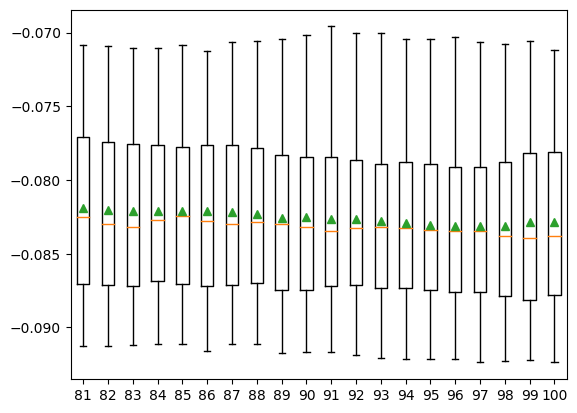

In [98]:
# compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)]

# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()